In [3]:
# --- STEP 1: Stream tokens and count frequencies (no Counter) ---
import json
def stream_tokens(jsonl_path):
    """Yield one token at a time from a JSONL with {"tokens": list[list[str]]} per line."""
    with open(jsonl_path, encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            obj = json.loads(line)
            # Each line's tokens are list-of-lists (per sentence). Flatten on the fly:
            for sent in obj.get("tokens", []):
                for tok in sent:
                    if tok:  # skip empty strings if any
                        yield tok

freq = {}
total_tokens = 0

for tok in stream_tokens("../../Assignment_1/tokenizer/tokenized_gu_tokens.jsonl"):
    # NOTE: for Gujarati, casefold/lower usually isn't necessary. Keep as-is.
    total_tokens += 1
    if tok in freq:
        freq[tok] += 1
    else:
        freq[tok] = 1

vocab_size = len(freq)
print(f"Total tokens: {total_tokens:,}")
print(f"Vocabulary size: {vocab_size:,}")


Total tokens: 816,891,414
Vocabulary size: 5,293,825


In [4]:
# --- STEP 2: Sort and inspect top-100 tokens ---

def top_n_items(d, n=100):
    return sorted(d.items(), key=lambda kv: kv[1], reverse=True)[:n]

top100 = top_n_items(freq, 100)
top100[:10]  # peek first 10


[('.', 47180163),
 ('છે', 30392250),
 (',', 22380397),
 ('અને', 13849835),
 ('આ', 8963127),
 ('કે', 7938582),
 ('પણ', 6289923),
 ('માટે', 6267718),
 ('-', 5013807),
 ('એક', 4764613)]

C:\Users\Vidhi\AppData\Local\Temp\ipykernel_7584\505311336.py:14: UserWarning: Glyph 2715 (\N{GUJARATI LETTER CHA}) missing from current font.
  plt.tight_layout()
C:\Users\Vidhi\AppData\Local\Temp\ipykernel_7584\505311336.py:14: UserWarning: Matplotlib currently does not support Gujarati natively.
  plt.tight_layout()
C:\Users\Vidhi\AppData\Local\Temp\ipykernel_7584\505311336.py:14: UserWarning: Glyph 2759 (\N{GUJARATI VOWEL SIGN E}) missing from current font.
  plt.tight_layout()
C:\Users\Vidhi\AppData\Local\Temp\ipykernel_7584\505311336.py:14: UserWarning: Glyph 2693 (\N{GUJARATI LETTER A}) missing from current font.
  plt.tight_layout()
C:\Users\Vidhi\AppData\Local\Temp\ipykernel_7584\505311336.py:14: UserWarning: Glyph 2728 (\N{GUJARATI LETTER NA}) missing from current font.
  plt.tight_layout()
C:\Users\Vidhi\AppData\Local\Temp\ipykernel_7584\505311336.py:14: UserWarning: Glyph 2694 (\N{GUJARATI LETTER AA}) missing from current font.
  plt.tight_layout()
C:\Users\Vidhi\AppData\Lo

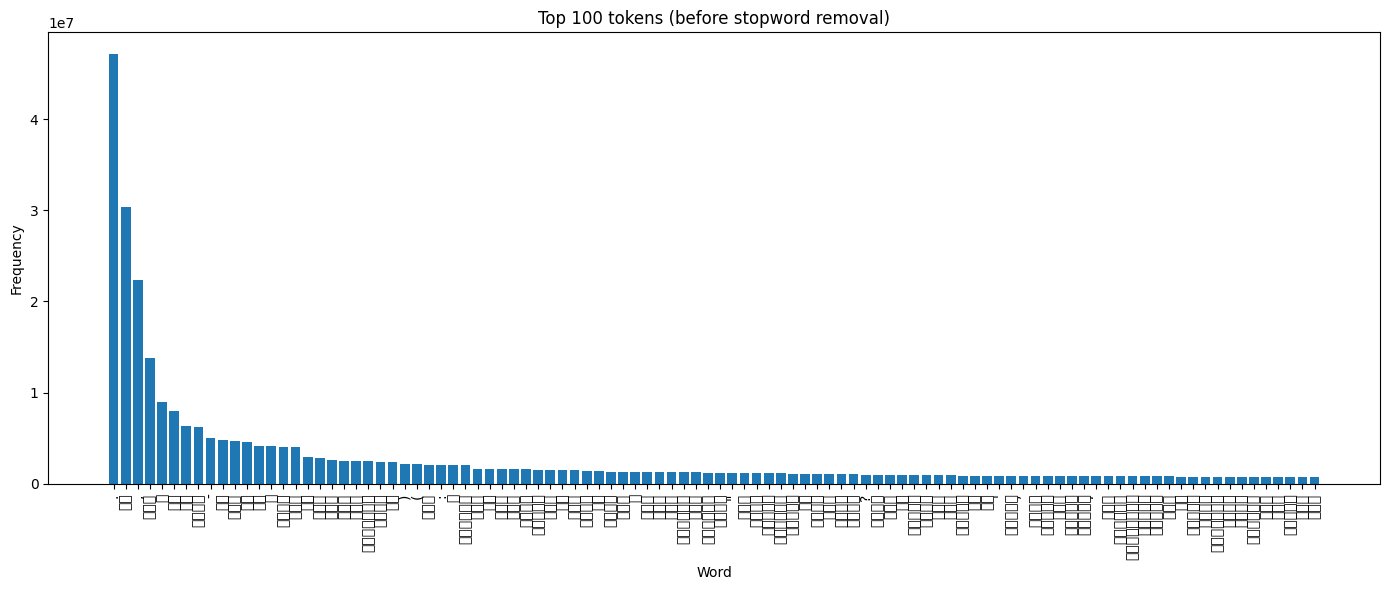

In [6]:
# --- Plot helper ---

import matplotlib.pyplot as plt

def plot_top(items, title):
    words = [w for w, _ in items]
    counts = [c for _, c in items]
    plt.figure(figsize=(14, 6))
    plt.bar(range(len(words)), counts)
    plt.xticks(range(len(words)), words, rotation=90)
    plt.title(title)
    plt.xlabel("Word")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

plot_top(top100, "Top 100 tokens (before stopword removal)")
